DATA UNDERSTANDING AND PREPARATION - TABULAR DATA

###### DATASET: TRACKS

In [1]:
# Qui abbiamo unito i due dataset in un unico file csv

# Carica i due dataset
#df1 = pd.read_csv('tracks.csv')
#df2 = pd.read_csv('artists.csv')
#merged_dataset = pd.concat([df1, df2], axis=0)
#merged_dataset.to_csv('trackartists.csv', index=False)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("trackartists.csv", low_memory=False)

DUPLICATES

Eliminazione duplicati

In [4]:
df = df.drop_duplicates()

##### Faccio un controllo sugli id, questo perchè essendo univoci se dovessero ancora comparire dei dulicati nonostante la pulizia fatta alla riga precedente vuol dire che bisogna agire in modo diverso

In [5]:
duplicati = df[df.duplicated(subset=['id'], keep=False)]
duplicati_ordinati = duplicati.sort_values(by='id')

In [6]:
# elimino di duplicati in base all'id
df = df.drop_duplicates(subset=["id"])

#### Abbiamo il problema che l'eliminazione viene effettuata a caso, elimina tutto fino a quando l'id non diviene unico, cosa sbagliata perchè noi dobbiamo tenere conto delle colonne con differenti valori, quindi:

#### Ordino il dataset basandomi sugli id uguali, di questi id uguali tengo solo quei records con popularity massima

In [7]:
indici_max_popolarita = df.groupby('id')['popularity'].idxmax()
# Mantieni solo i record con gli indici trovati
df = df.loc[indici_max_popolarita]

In [8]:
df

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre,followers,genres
43417,0000vdREvCVMxbQTkS888c,Lolly,1.0,160725.0,True,35.0,1.0,Rill,single,Lolly,...,154.11664,0.578,1.000,0.685,0.583,276.0,67.0,german,NaN,NaN
93608,000CC8EParg64OmTxVnZ0p,It's All Coming Back To Me Now (Glee Cast Vers...,1.0,322933.0,False,49.0,10.0,Glee Cast,album,Glee Love Songs,...,313.21976,0.030,0.659,0.712,0.717,937.0,238.0,club,NaN,NaN
61659,000Iz0K615UepwSJ5z2RE5,Böxig Leise - Pig&Dan Remix,1.0,515360.0,False,0.0,5.0,Paul Kalkbrenner;Pig&Dan,album,X,...,474.23273,0.832,0.996,0.052,0.322,1025.0,257.0,minimal-techno,NaN,NaN
423,000RDCYioLteXcutOjeweY,Teeje Week,1.0,190203.0,False,62.0,1.0,Jordan Sandhu;Bunty Bains,single,Teeje Week,...,183.53633,0.103,1.000,0.339,0.473,501.0,124.0,hip-hop,NaN,NaN
31,000qpdoc97IMTBvF8gwcpy,Tief,1.0,331240.0,False,20.0,9.0,Paul Kalkbrenner,album,Zeit,...,321.92145,0.622,1.000,0.011,0.160,699.0,175.0,minimal-techno,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58393,7zyYmIdjqqiX6kLryb7QBx,以後別做朋友,1.0,260573.0,False,64.0,2.0,Eric Chou,album,學著愛,...,235.45615,0.270,0.822,0.395,0.533,539.0,135.0,mandopop,NaN,NaN
36699,7zybSU9tFO9HNlwmGF7stc,Sunset Drive,1.0,234300.0,False,60.0,5.0,Stereoclip,album,Echoes,...,228.68753,0.958,0.895,0.493,0.233,485.0,121.0,electronic,NaN,NaN
64088,7zz7iNGIWhmfFE7zlXkMma,Grant Hart,1.0,144973.0,False,22.0,10.0,The Posies,album,Amazing Disgrace,...,144.97333,0.715,0.866,0.274,0.355,417.0,104.0,power-pop,NaN,NaN
138352,7zzNybPMppMTQu6GjtdYX2,Marcin Mrozinski,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,527.0,[]


In [9]:
df = df.drop(columns=['followers', 'genres'])

In [19]:
df = df.dropna()

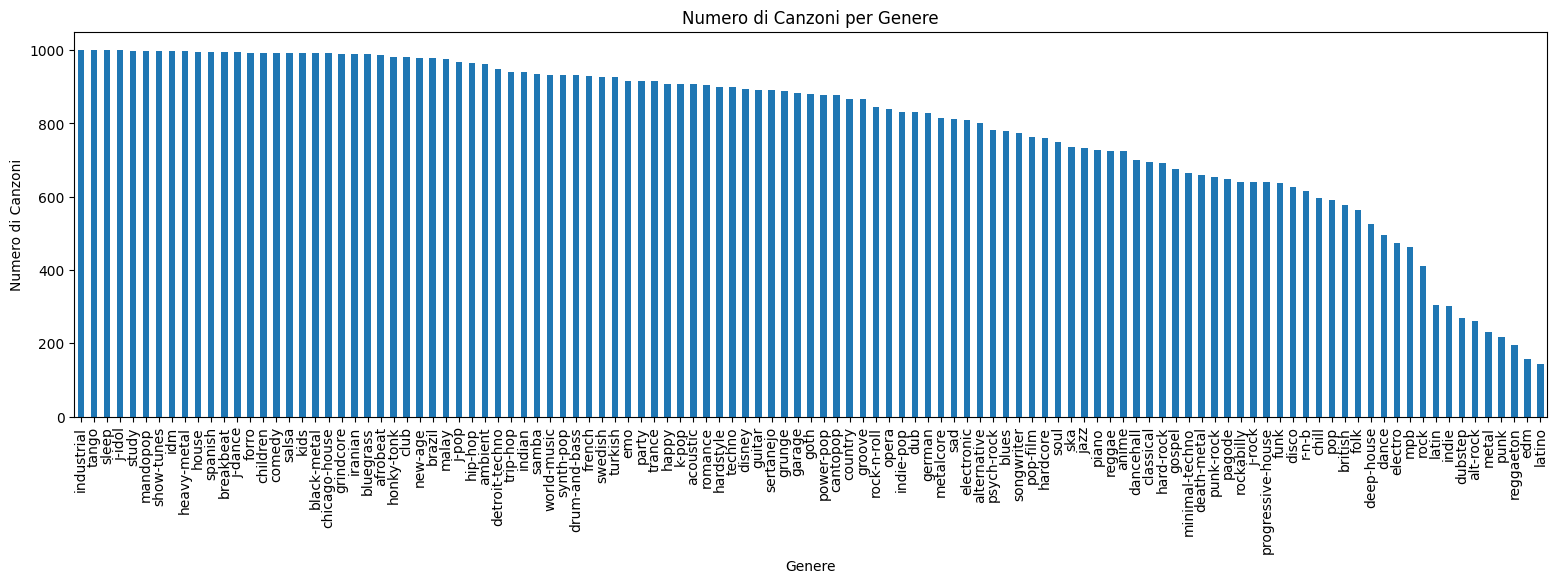

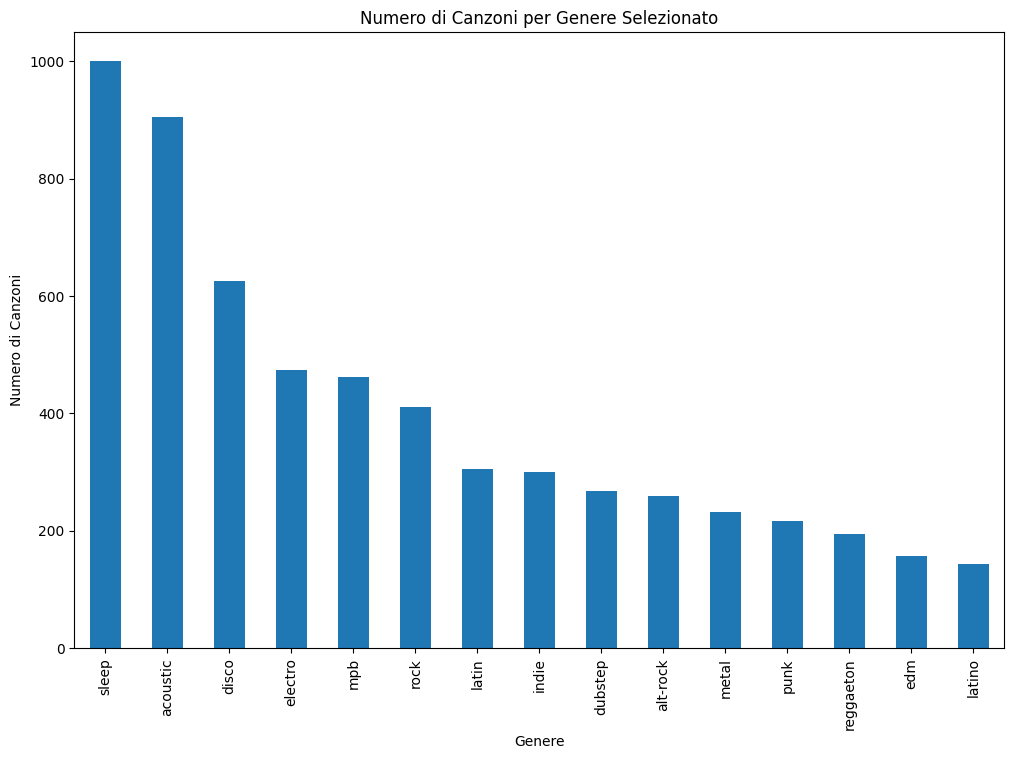

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

genres = df['genre']
genre_counts = genres.value_counts()

# Creare un grafico a barre
plt.figure(figsize=(19, 5))
genre_counts.plot(kind='bar')
plt.title('Numero di Canzoni per Genere')
plt.xlabel('Genere')
plt.ylabel('Numero di Canzoni')
plt.show()



# Lista dei generi desiderati
desired_genres = ['sleep', 'acoustic', 'disco', 'electro', 'mpb', 'rock', 'latin', 'indie', 'dubstep', 'alt-rock', 'metal', 'punk', 'reggaeton', 'edm', 'latino']

# Estrarre la colonna dei generi (supponiamo che la colonna si chiami 'genre')
genres = df['genre']

# Filtrare i dati per i generi desiderati
filtered_genres = genres[genres.isin(desired_genres)]

# Contare il numero di canzoni per ogni genere
genre_counts = filtered_genres.value_counts()

# Creare un grafico a barre
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar')
plt.title('Numero di Canzoni per Genere Selezionato')
plt.xlabel('Genere')
plt.ylabel('Numero di Canzoni')
plt.show()


Dopo aver eliminato i duplicati con il comando "drop_duplicates" ho ho verificato che effettivamente tutti i duplicati fossero stati tolti. La verifica non ha dato un risultato positivo. La verifica consisteva nella visualizzazione delle top 50 e ultime 50 canzoni presenti nel dataset, il mio ragionamento è che se dovessi avere ancora dei duplicati presenti c'era una alta probabilità che li avrei trovati ai due estremi di popularity. 
Il mio dubbio era fondato, ed ho trovato dei duplicati che non erano stati rimossi, questo perchè il comando usato in precedenza si occupa di eliminare quei records che in tutte le colonne hanno elementi uguali tra loro. 
Così ho eliminato i duplicati in base all'id ed effettivamente il problema veniva risolto, però ne è nato un altro, ovvero, venivano eliminato si i doppioni in base all'id ma non sapendo effettivamente queali erano le colonne che cambiavano valore e che quindi rendevano i record falsi diversi, avrei eliminato senza seguire un criterio. Quindi ho attuato una strategia differente.
Dato che i record duplici avevano il medisemo id ho controllato come mai alcune colonne avessero dati differenti, dall'analisi è uscito che il valore che cambiava era "popularity" e il nome dell'album, questo mi ha fatto pensare al fatto che sarebbe stato utile mantere quei record che confrontati tra loro (sempre medesimo id, quindi parliamo delle stesse canzoni) avessero popularity maggiore, in questo modo abbiamo risolto il problema dei duplicati e selezionato i record tramite un criterio fondato e non random.

### MISSING VALUE

In [11]:
# Creo una nuova colonna chiamata "genre_pulito" dove di base metto il genere di "genre" ma nel caso ci sia un NaN in genre allora mette quello
# di "genres" in questo modo risolviamo i problemi dei missing value e mergiamo due colonne facendone diventare una sola.

#df['genre_pulito'] = df['genre'].fillna(df['genres'])
#colonne_da_eliminare = ['genre', 'genres']
#df = df.drop(columns=colonne_da_eliminare)

In [12]:
# Visualizza i record con valori NaN nella colonna 'name'
#nan_values = df[df['name'].isna()]
#print("Record con valori NaN nella colonna 'name':")
#print(nan_values)

# trovato il NaN in name, ho visualizzato il record che conteneva NaN in ogni colonna quindi procedo all'eliminazione del record
df = df.dropna(subset=['name'])

##### Controllo i missing value per la colonna key, perchè differeisce da tutte le altre perchè risulta avere un missing value solo se il valore è -1.

In [13]:
missing_values_key = df[df['key'] == -1]
print(missing_values_key)

# il codice ci mostra che non sono presenti Missing value.

Empty DataFrame
Columns: [id, name, disc_number, duration_ms, explicit, popularity, track_number, artists, album_type, album_name, album_release_date, album_release_date_precision, album_total_tracks, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, features_duration_ms, time_signature, start_of_fade_out, tempo_confidence, time_signature_confidence, key_confidence, mode_confidence, n_beats, n_bars, genre]
Index: []

[0 rows x 34 columns]


In [14]:
# Ho visualizzato quelli che sono i NaN in followers per capire come lavorarci e non trovando un modo per poter riempire i NaN procedo con
# l'eliminazione
#nan_values = df[df['followers'].isna()]
#print("Record con valori NaN nella colonna 'followers': ",nan_values)
colonna_da_eliminare = ['followers']
df = df.drop(columns=colonna_da_eliminare)

KeyError: "['followers'] not found in axis"

Elimino tutti i missing value

In [ ]:
df = df.dropna()

In [ ]:
missing_values = df.isnull().sum()

### DISTRIBUZIONE DELLE FREQUENZE

Con questo grafico possiamo vedere come il genere più popolare risulta essere il "pop" e quello meno popolare è l'iranian. Questi due dati sono estremamente interessanti perchè un cantante può utilizzarli per poter scegliere quale genere usare nel caso in cui voglia avere più possibilità di fare successo con una canzone. Ci sono ovviamente dei validi sostituti come il "rock" e il "k-pop che sono poco sotto il pop.

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


IndexError: index 0 is out of bounds for axis 0 with size 0

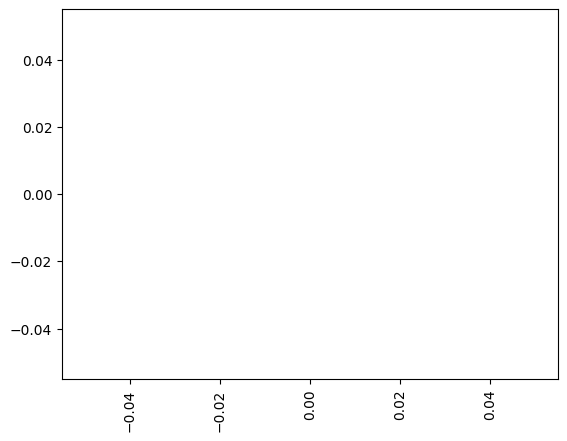

In [ ]:
#Con questo grafico posso visualizzare le frequenze nella colonna popularity di 45 valori.

frequency_distribution = df['popularity'].value_counts()

# Only keep the top 45 values
top_45 = frequency_distribution.head(45)

top_45.plot(kind='bar')
plt.title('Frequency distribution of top 10 popularity values')
plt.show()

### Correlazione

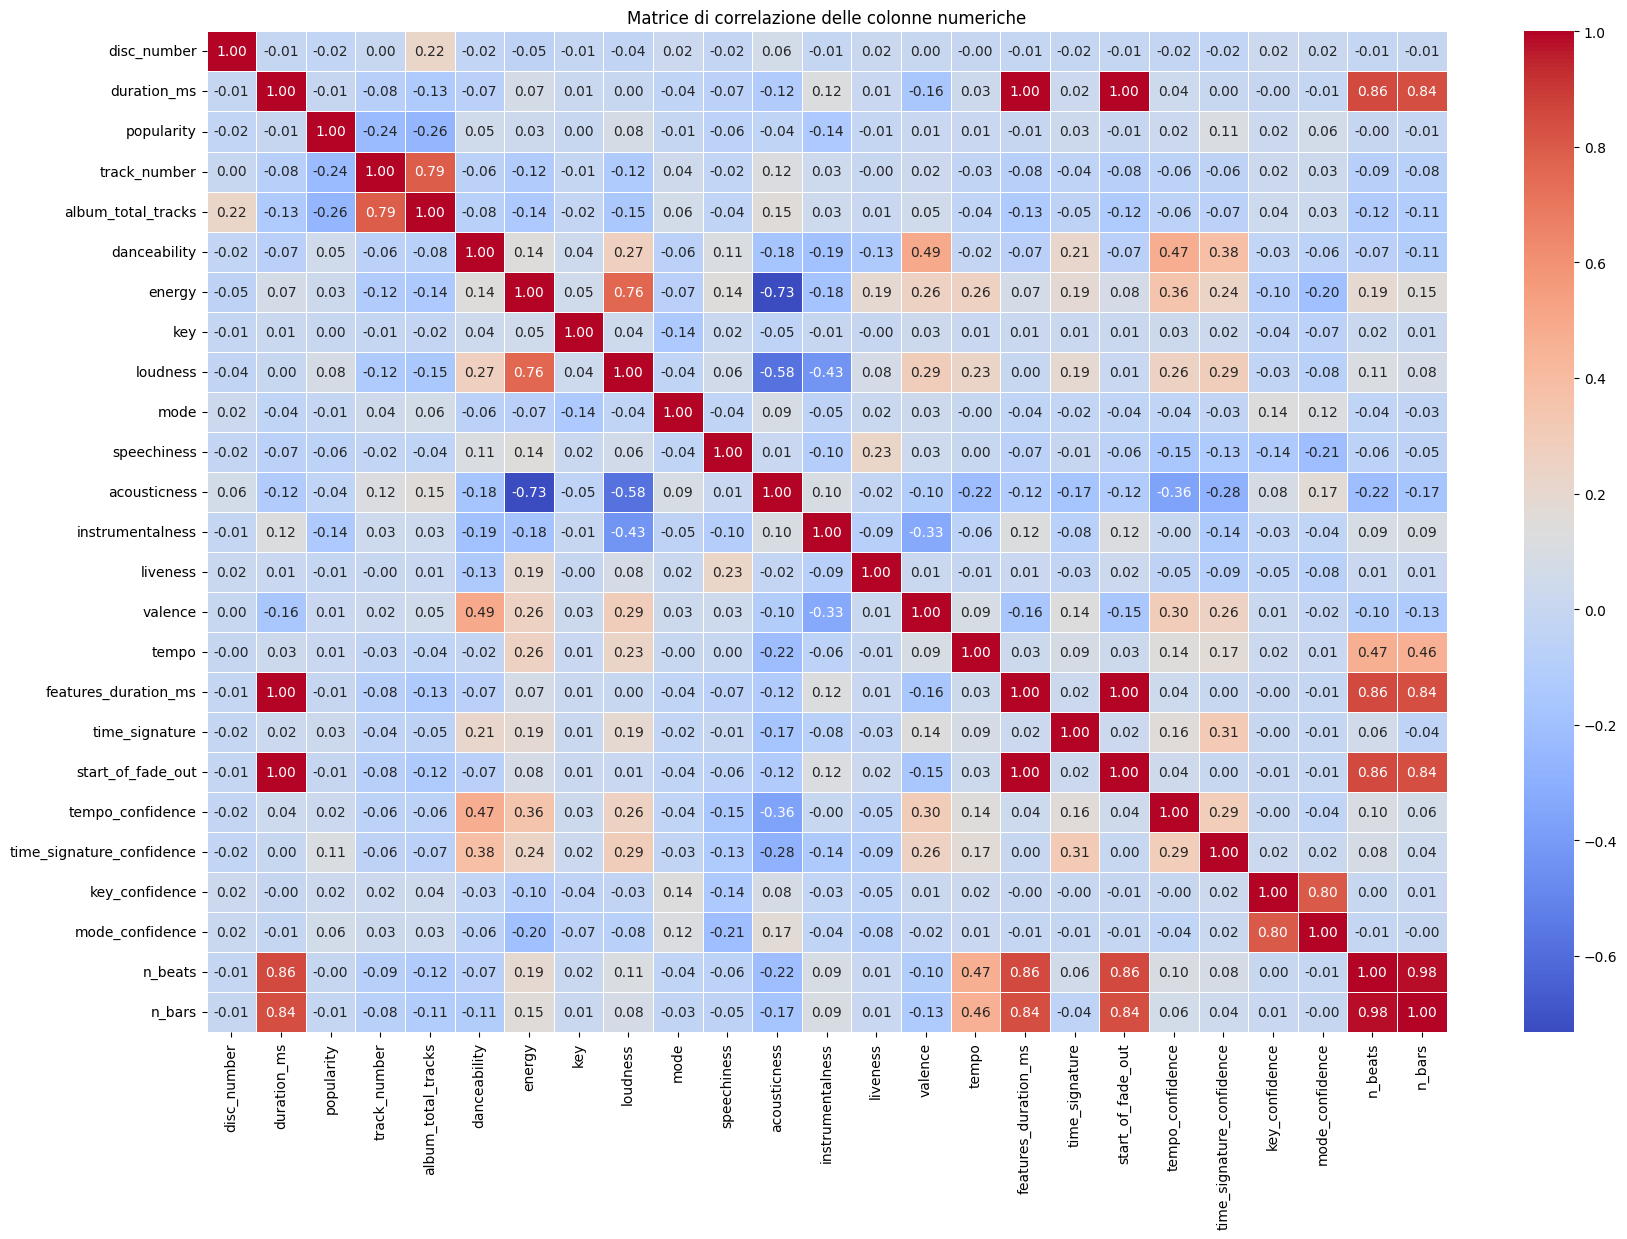

In [ ]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
# Escludi le colonne non numeriche
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Visualizza la matrice di correlazione con un heatmap
plt.figure(figsize=(20, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrice di correlazione delle colonne numeriche')
plt.show()